<a href="https://colab.research.google.com/github/Saadi128/EDA-PROJECT-REPORT/blob/main/Deep_Learning_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


Imports libraries for data manipulation, visualization, and deep learning.

ReduceLROnPlateau and EarlyStopping help manage learning rate and prevent overfitting.

In [2]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()
X = data.data
y = data.target


fetch_covtype() loads the UCI Forest CoverType dataset directly.

X contains features and y contains class labels (1 to 7).

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode labels for neural network
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train - 1, num_classes=7)
y_test_cat = to_categorical(y_test - 1, num_classes=7)


StandardScaler normalizes input features for better learning.

to_categorical() converts labels to one-hot encoded vectors for multi-class classification.

In [4]:
def create_model():
    model = Sequential()
    model.add(Dense(256, input_shape=(X.shape[1],), activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.2))

    model.add(Dense(7, activation='softmax'))  # 7 classes

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,223 (223.53 KB)

 Trainable params: 56,455 (220.53 KB)

 Non-trainable params: 768 (3.00 KB)

Uses ReLU + BatchNorm + Dropout + L2 regularization.

Ends with softmax for multi-class output.

You can try LeakyReLU, SELU, or other optimizers as experiments.

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(X_train, y_train_cat,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=512,
                    callbacks=[early_stop, lr_scheduler])


Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.7667 - loss: 0.6305 - val_accuracy: 0.7841 - val_loss: 0.5805 - learning_rate: 0.0010
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7729 - loss: 0.6217 - val_accuracy: 0.7932 - val_loss: 0.5727 - learning_rate: 0.0010
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.7769 - loss: 0.6123 - val_accuracy: 0.7998 - val_loss: 0.5618 - learning_rate: 0.0010
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7799 - loss: 0.6070 - val_accuracy: 0.7961 - val_loss: 0.5619 - learning_rate: 0.0010
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7809 - loss: 0.6041 - val_accuracy: 0.7992 - val_loss: 0.5602 - learning_rate: 0.0010
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7816 - loss: 0.6001 - val_accuracy: 0.8021 - val_loss: 0.5543 - learning_rate: 0.0010
Epoch 7/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7827 - l

EarlyStopping avoids overfitting.

ReduceLROnPlateau adjusts learning rate dynamically.

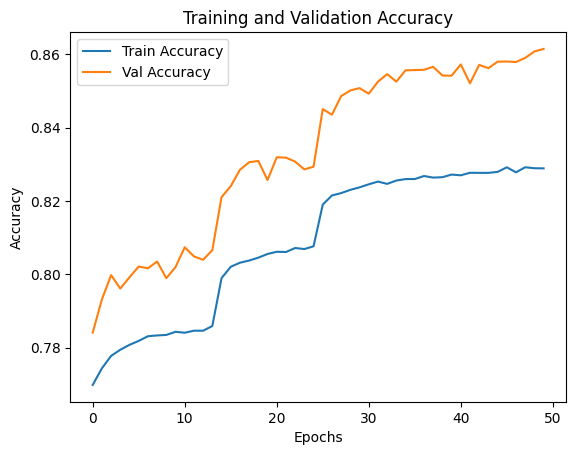

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [8]:
# Predict and evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) + 1  # Shift back to 1–7
print(classification_report(y_test, y_pred, digits=4))


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           1     0.8851    0.8321    0.8578     42368
           2     0.8614    0.9138    0.8868     56661
           3     0.8081    0.8493    0.8282      7151
           4     0.7728    0.6940    0.7313       549
           5     0.7234    0.4697    0.5696      1899
           6     0.7043    0.6254    0.6625      3473
           7     0.8814    0.8459    0.8633      4102

    accuracy                         0.8607    116203
   macro avg     0.8052    0.7472    0.7713    116203
weighted avg     0.8601    0.8607    0.8592    116203



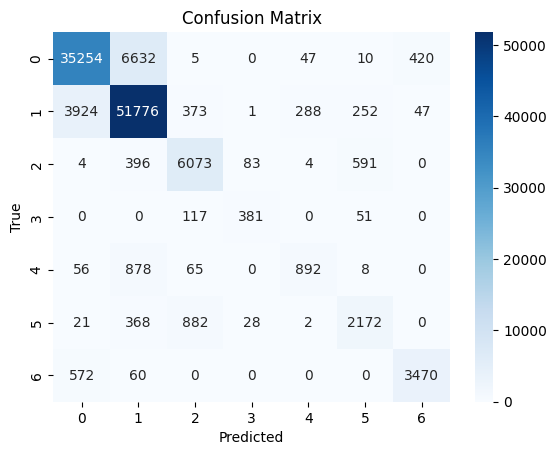

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(classification_report(y_test, rf_preds, digits=4))


              precision    recall  f1-score   support

           1     0.9630    0.9417    0.9523     42368
           2     0.9485    0.9726    0.9604     56661
           3     0.9395    0.9592    0.9492      7151
           4     0.9181    0.8579    0.8870       549
           5     0.9518    0.7688    0.8506      1899
           6     0.9278    0.8914    0.9093      3473
           7     0.9731    0.9451    0.9589      4102

    accuracy                         0.9533    116203
   macro avg     0.9460    0.9053    0.9240    116203
weighted avg     0.9534    0.9533    0.9530    116203



**Summary**
Non-linear splits and categorical interactions can be effectively handled by tree-based ensemble models such as Random Forest and XGBoost.  Without enough feature engineering or a lot of data, MLPs frequently perform poorly, while tree models are better at structured data because they naturally capture hierarchical patterns.